In [ ]:
!pip install transformers


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from transformers import VisionEncoderDecoderModel, ViTFeatureExtractor, AutoTokenizer
import torch
from PIL import Image


In [ ]:
model = VisionEncoderDecoderModel.from_pretrained("nlpconnect/vit-gpt2-image-captioning")



Some weights of the model checkpoint at nlpconnect/vit-gpt2-image-captioning were not used when initializing VisionEncoderDecoderModel: ['decoder.transformer.h.2.crossattention.bias', 'decoder.transformer.h.11.crossattention.masked_bias', 'decoder.transformer.h.8.attn.masked_bias', 'decoder.transformer.h.4.crossattention.masked_bias', 'decoder.transformer.h.6.attn.bias', 'decoder.transformer.h.3.attn.bias', 'decoder.transformer.h.0.attn.masked_bias', 'decoder.transformer.h.11.crossattention.bias', 'decoder.transformer.h.7.crossattention.masked_bias', 'decoder.transformer.h.4.attn.bias', 'decoder.transformer.h.11.attn.masked_bias', 'decoder.transformer.h.10.crossattention.bias', 'decoder.transformer.h.3.crossattention.masked_bias', 'decoder.transformer.h.6.crossattention.bias', 'decoder.transformer.h.8.attn.bias', 'decoder.transformer.h.5.attn.bias', 'decoder.transformer.h.6.crossattention.masked_bias', 'decoder.transformer.h.2.attn.bias', 'decoder.transformer.h.5.attn.masked_bias', 'de

In [ ]:
feature_extractor = ViTFeatureExtractor.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
tokenizer = AutoTokenizer.from_pretrained("nlpconnect/vit-gpt2-image-captioning")


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)



VisionEncoderDecoderModel(
  (encoder): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTAttention(
            (attention): ViTSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_featur

In [ ]:
max_length = 16
num_beams = 4
gen_kwargs = {"max_length": max_length, "num_beams": num_beams}


In [ ]:
def predict_step(image_paths):
  images = []
  for image_path in image_paths:
    i_image = Image.open(image_path)
    if i_image.mode != "RGB":
      i_image = i_image.convert(mode="RGB")

    images.append(i_image)

  pixel_values = feature_extractor(images=images, return_tensors="pt").pixel_values
  pixel_values = pixel_values.to(device)

  output_ids = model.generate(pixel_values, **gen_kwargs)

  preds = tokenizer.batch_decode(output_ids, skip_special_tokens=True)
  preds = [pred.strip() for pred in preds]
  return preds


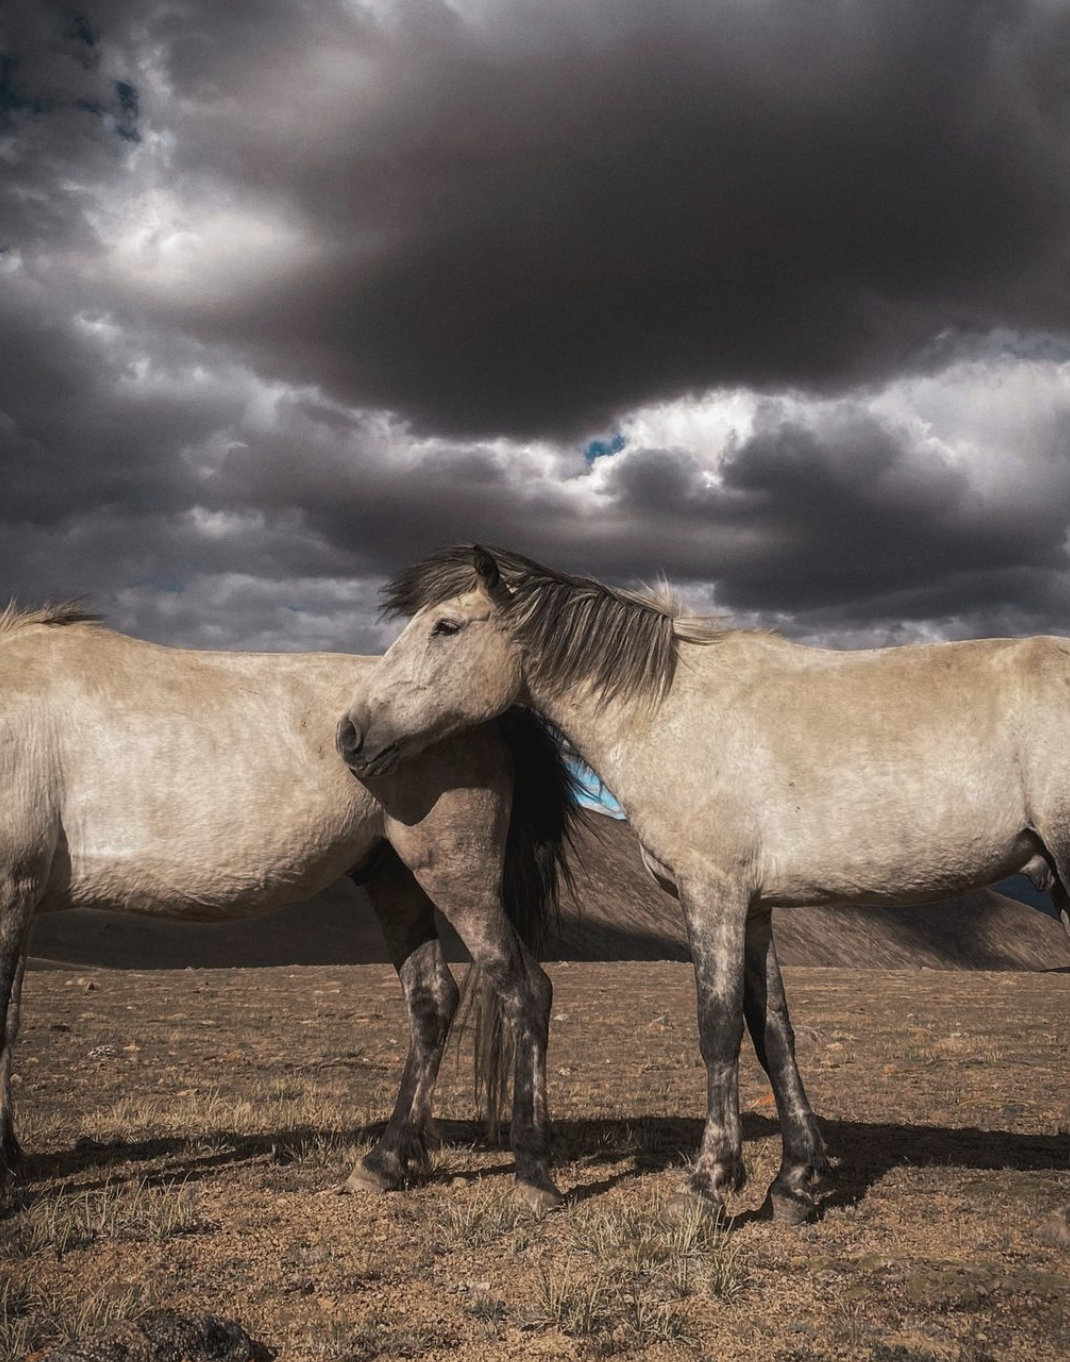

In [ ]:

# creating a object
im = Image.open(r"/content/Image2.png")

im.show()

In [ ]:
predict_step(['Image2.png'])


['a woman is standing in a field with a horse']

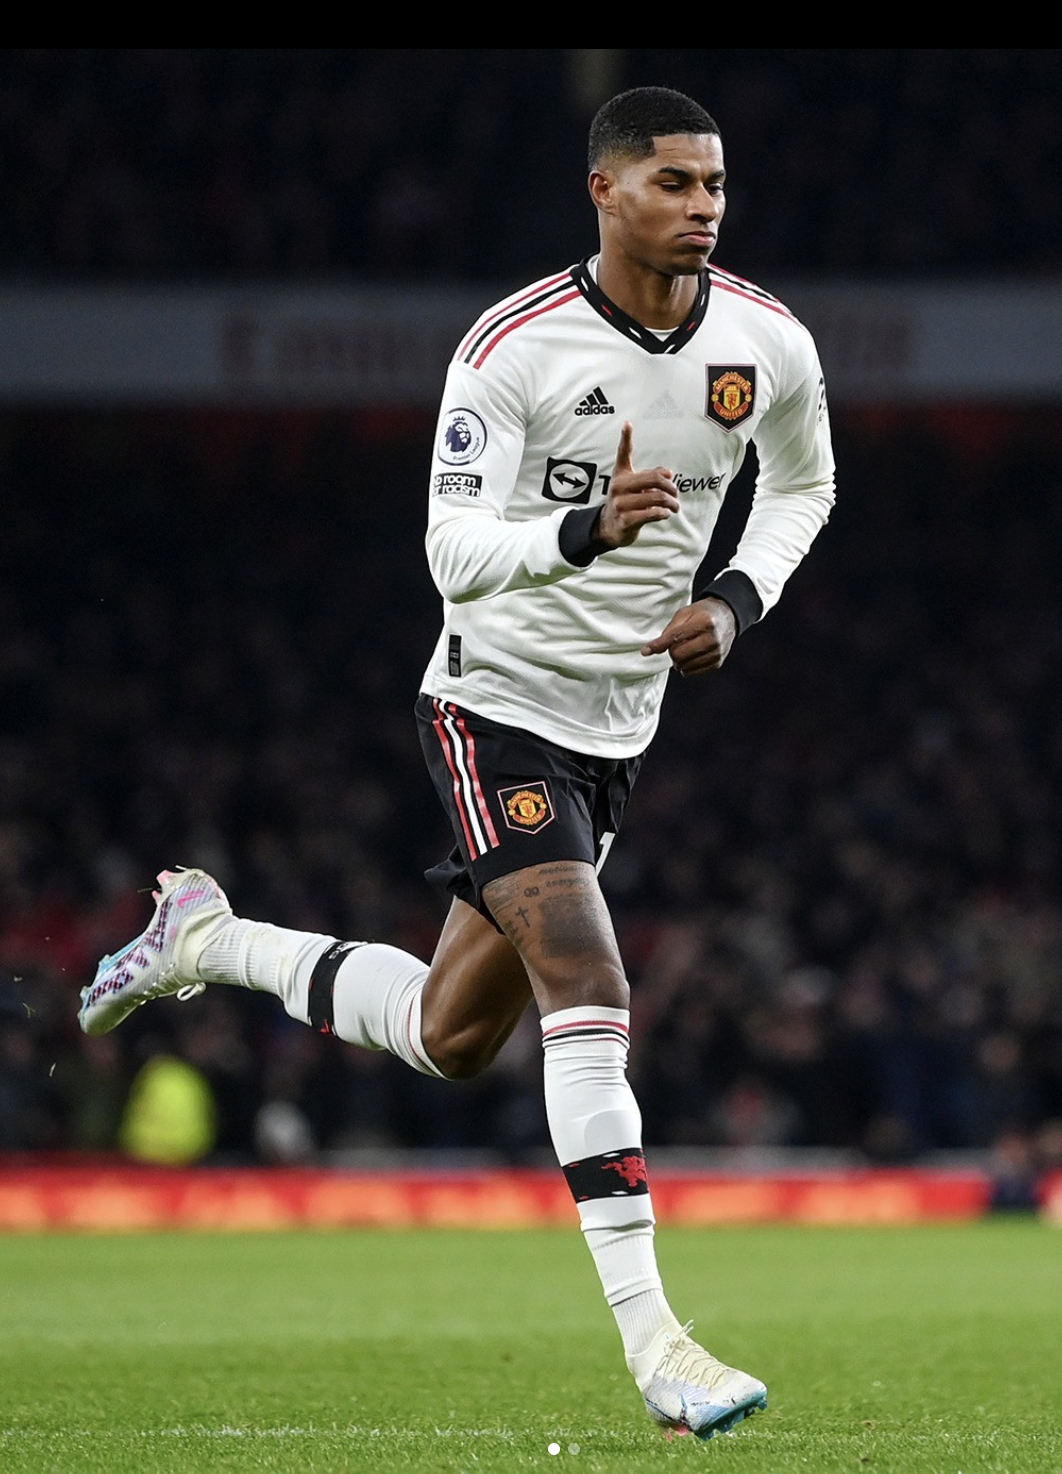

In [ ]:
im = Image.open(r"/content/Image1.png")

im.show()

In [ ]:
predict_step(['Image1.png'])

['a man kicking a soccer ball on a field']

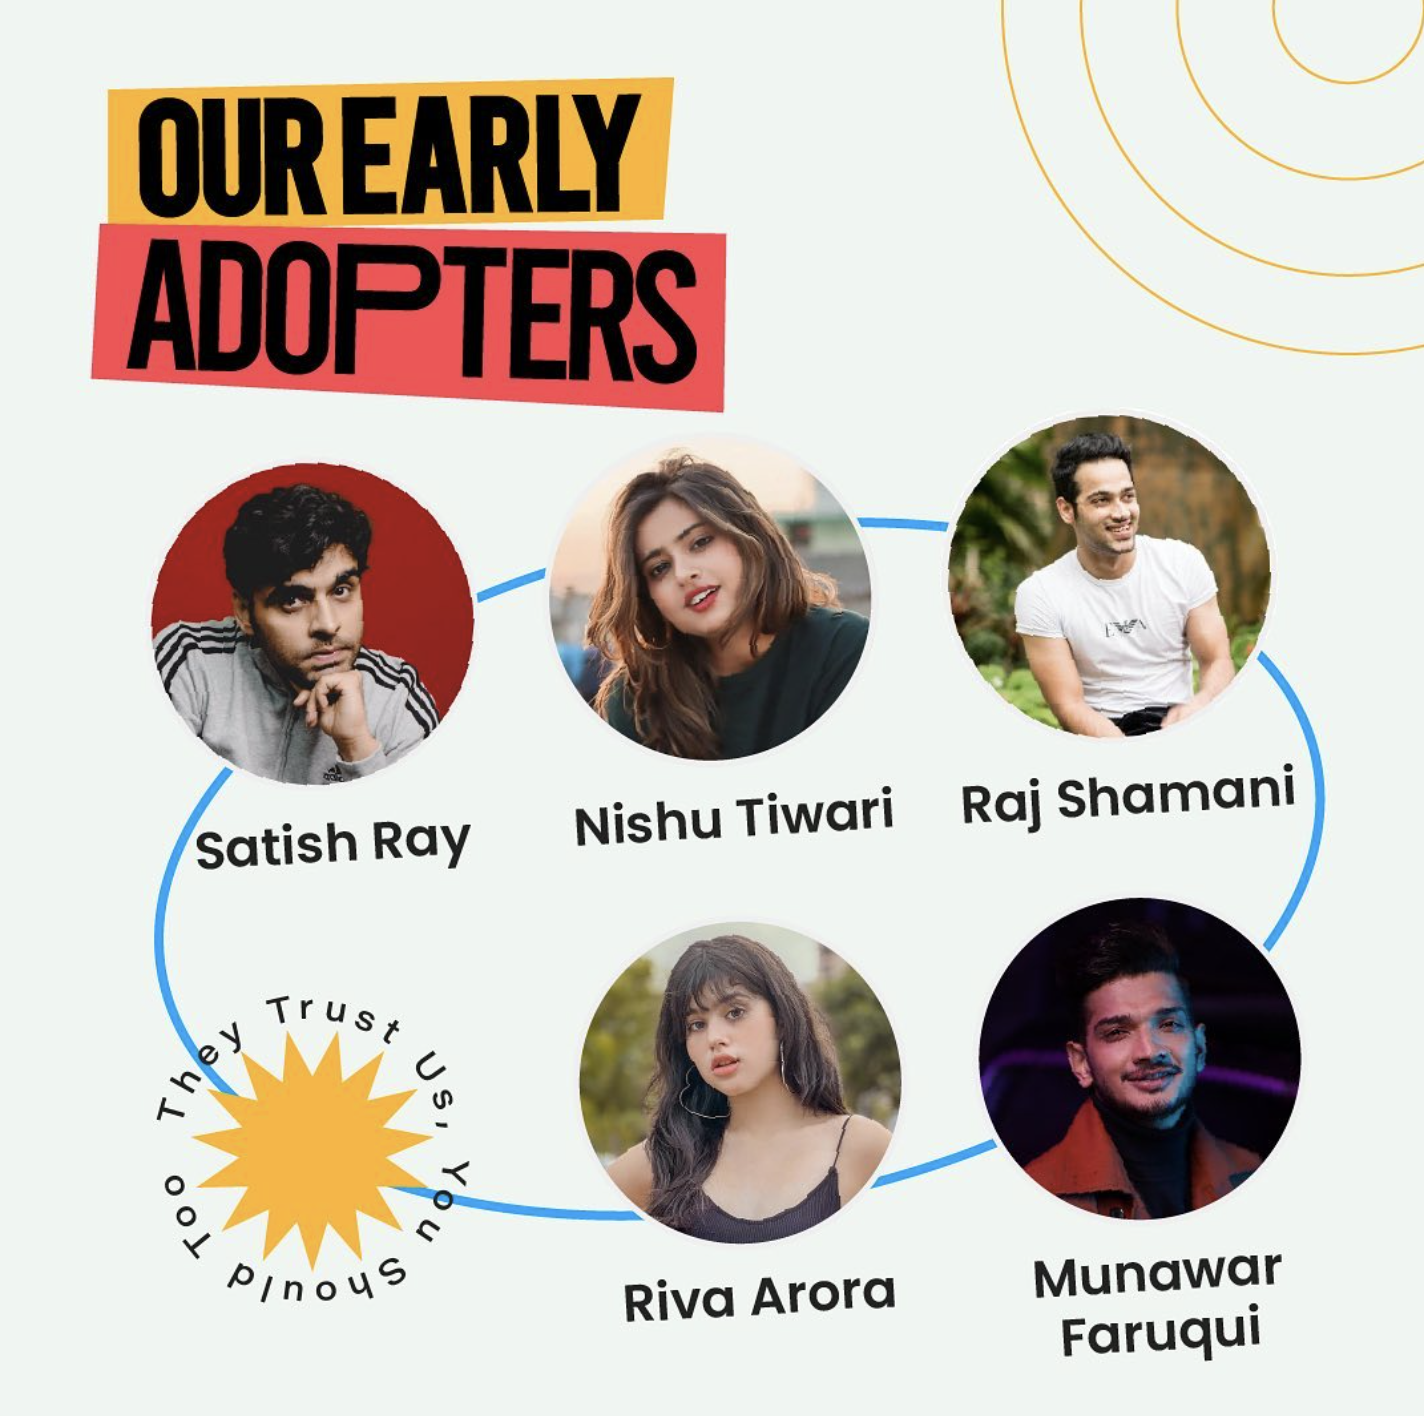

In [ ]:
im = Image.open(r"/content/Image3.png")

im.show()

In [ ]:
predict_step(['Image3.png'])